<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jorgefdzlara/blob/main/Actividad_semanal6_A01793062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno:** Jorge Fernández Lara 

**Matrícula:** A01793062

**Materia:** Ciencia y Analítica de Datos

**Actividad Semanal:** 6

**Profesora:** María de la Paz Rico Fernández

**Fecha:** 1 de noviembre de 2022



# **Visualización de datos**

**Instrucciones:** Sigue las instrucciones y desarrolla en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.

1. Descarga los datos y carga el dataset en tu libreta.

Información del conjunto de datos:

Corresponde a un caso de clientes de pagos en Taiwan y compara la precisión de la probabilidad entre ser métodos de minería de datos. Desde la perspectiva de manejo de riesgos, el resultado de la precisión predictiva de la probabilidad estimada, será más valiosa que el resultado binario de la clasificación. Clientes acreditables o no acreditables.

Debido a la probabilidad real de default es desconocida, este estudio presentó el modelo de suavizado en clasificación para estimar la probabilidad real del default. Con la probabilidad real del default como la variable respuesta (Y), 
y la probabilidad de predicción del default como la variable independeiente (X), la regresión lineal simple resulta (Y = A + BX) muestra qiue predecir el modelo producido por una red neuronal artificial, tiene el mayor coeficiente de determinación. Su intrcepto de regresión (A) es cercano a cero, y el coeficiente de regresión (B) a uno. por ello, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar de forma precisa la probabilidad real del default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [253]:
import pandas as pd

In [254]:
filename='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes(), info(), isna()

In [255]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv(filename)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [256]:
#Trabajar en una copia por si sucede algo
ndf = df.copy()

In [257]:
#elimino la columna ID y la variable de salida
ndf.drop(columns={'ID','Y'}, inplace=True)

In [258]:
#cambio los nombres de X a variables entendibles conforme la descripción
ndf.columns = ['Credito_Otorgado', 'Genero', 'Educacion', 'Estatus_Marital', 'Edad','PP_Sep','PP_Aug','PP_Jul','PP_Jun','PP_May','PP_Apr',
                    'BS_Sep','BS_Aug','BS_Jul','BS_Jun','BS_May','BS_Apr','LP_Sep','LP_Aug','LP_Jul','LP_Jun','LP_May','LP_Apr']
ndf.head()

,Credito_Otorgado,Genero,Educacion,Estatus_Marital,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [259]:
ndf.shape

(30000, 23)

In [260]:
ndf.columns

Index(['Credito_Otorgado', 'Genero', 'Educacion', 'Estatus_Marital', 'Edad',
       'PP_Sep', 'PP_Aug', 'PP_Jul', 'PP_Jun', 'PP_May', 'PP_Apr', 'BS_Sep',
       'BS_Aug', 'BS_Jul', 'BS_Jun', 'BS_May', 'BS_Apr', 'LP_Sep', 'LP_Aug',
       'LP_Jul', 'LP_Jun', 'LP_May', 'LP_Apr'],
      dtype='object')

In [261]:
ndf.dtypes

Credito_Otorgado      int64
Genero              float64
Educacion           float64
Estatus_Marital     float64
Edad                float64
PP_Sep              float64
PP_Aug              float64
PP_Jul              float64
PP_Jun              float64
PP_May              float64
PP_Apr              float64
BS_Sep              float64
BS_Aug              float64
BS_Jul              float64
BS_Jun              float64
BS_May              float64
BS_Apr              float64
LP_Sep              float64
LP_Aug              float64
LP_Jul              float64
LP_Jun              float64
LP_May              float64
LP_Apr              float64
dtype: object

In [262]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Credito_Otorgado  30000 non-null  int64  
 1   Genero            29999 non-null  float64
 2   Educacion         29998 non-null  float64
 3   Estatus_Marital   29998 non-null  float64
 4   Edad              29995 non-null  float64
 5   PP_Sep            29997 non-null  float64
 6   PP_Aug            29995 non-null  float64
 7   PP_Jul            29993 non-null  float64
 8   PP_Jun            29991 non-null  float64
 9   PP_May            29984 non-null  float64
 10  PP_Apr            29986 non-null  float64
 11  BS_Sep            29989 non-null  float64
 12  BS_Aug            29989 non-null  float64
 13  BS_Jul            29987 non-null  float64
 14  BS_Jun            29985 non-null  float64
 15  BS_May            29983 non-null  float64
 16  BS_Apr            29990 non-null  float6

In [263]:
ndf.isna()

,Credito_Otorgado,Genero,Educacion,Estatus_Marital,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [264]:
ndf.isna().any()

Credito_Otorgado    False
Genero               True
Educacion            True
Estatus_Marital      True
Edad                 True
PP_Sep               True
PP_Aug               True
PP_Jul               True
PP_Jun               True
PP_May               True
PP_Apr               True
BS_Sep               True
BS_Aug               True
BS_Jul               True
BS_Jun               True
BS_May               True
BS_Apr               True
LP_Sep               True
LP_Aug               True
LP_Jul               True
LP_Jun               True
LP_May               True
LP_Apr               True
dtype: bool

3. Limpia los datos eliminando los registros o rellena con la media de la columna.

In [265]:
#Elimino los valores vacíos
ndf.dropna(inplace=True)

In [266]:
#Compruebo que no existan datos vacíos
ndf.isna().any()

Credito_Otorgado    False
Genero              False
Educacion           False
Estatus_Marital     False
Edad                False
PP_Sep              False
PP_Aug              False
PP_Jul              False
PP_Jun              False
PP_May              False
PP_Apr              False
BS_Sep              False
BS_Aug              False
BS_Jul              False
BS_Jun              False
BS_May              False
BS_Apr              False
LP_Sep              False
LP_Aug              False
LP_Jul              False
LP_Jun              False
LP_May              False
LP_Apr              False
dtype: bool

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [267]:
ndf.describe()

,Credito_Otorgado,Genero,Educacion,Estatus_Marital,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


La desviación estándar está dada por el término "std" que también nos representa la dispersión de nuestros datos.

Para el caso del promedio, se encuentra dado por el término mean.

El dato de "Educación" es incorrecto, ya que por la descripción el máximo debería ser 4, por lo que para estandarizar, almacenaré los valores  diferentes a 1,2 y 3 como 4 en la categoría de "Otros".

De la misma forma el estatus marital que no debería haber 0.

In [268]:
ndf['Educacion'].replace(np.nan, 4.0, inplace=True )
ndf['Educacion'].replace(5.0, 4.0, inplace=True )
ndf['Educacion'].replace(6.0, 4.0, inplace=True )
ndf['Educacion'].replace(0, 4.0, inplace=True )

In [269]:
ndf['Estatus_Marital'].replace(np.nan, 3.0, inplace=True )
ndf['Estatus_Marital'].replace(0.0, 3.0, inplace=True )

In [270]:
ndf.describe()

,Credito_Otorgado,Genero,Educacion,Estatus_Marital,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.557147,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,0.489070,0.744557,0.521388,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


5. Realiza el conteo de las variables categóricas


In [271]:
ColumnasCat = ndf[['Genero','Educacion','Estatus_Marital']]
ColumnasCat.head()

,Genero,Educacion,Estatus_Marital
0,2.0,2.0,1.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0
3,2.0,2.0,1.0
4,1.0,2.0,1.0


6. Escala los datos, si consideras necesario


In [272]:
ndf_num = ndf.drop(ColumnasCat, axis = 1)
ndf_num.head()

,Credito_Otorgado,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,PP_Apr,BS_Sep,BS_Aug,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
0,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


7. Reduce las dimensiones con PCA, si consideras necesario.
  1. Indica la varianza de los datos explicada por cada componente seleccionado.  Para actividades de exploración de los datos la varianza > 70%
  2. Indica la importancia de las variables en cada componente


Derivado que el análisis de PCA requiere los datos normalizados, se realiza en primer lugar:

In [273]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ndf_num)
scaled_ndf_num= pd.DataFrame (scaled, columns=ndf_num.columns)
scaled_ndf_num.head()

,Credito_Otorgado,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,PP_Apr,BS_Sep,BS_Aug,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [275]:
pca = PCA()

In [276]:
pca_columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20']
pca_t = pca.fit_transform(scaled_ndf_num)
pca_df=pd.DataFrame(pca_t, columns=pca_columns)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.020521,-0.273973,-0.043387,-0.341613,-0.127601,-0.039506,0.048982,0.099118,0.061939,0.007676,-0.015861,0.016386,-0.007381,0.009523,-0.003479,-0.004124,0.000079,4.687435e-07,0.000446,-0.000160
1,0.174663,-0.173883,0.015432,0.110112,-0.014846,0.037276,0.248414,0.028627,0.093665,-0.011030,0.005410,-0.007362,-0.014689,0.005911,-0.002002,-0.000899,-0.002839,-9.525532e-05,0.000492,-0.000519
2,0.051330,-0.073566,-0.063689,0.020747,0.016886,-0.000166,0.005587,0.001088,0.000138,-0.002099,0.006349,0.000880,0.000023,-0.006463,0.003428,-0.000396,0.004878,-5.146188e-03,-0.001194,-0.000398
3,0.063270,-0.030352,-0.089166,-0.008240,0.069036,0.003498,0.002252,0.001279,-0.000317,-0.005936,0.006100,-0.007026,0.002177,-0.000236,-0.002672,0.001176,0.002310,5.296748e-03,0.000903,-0.003406
4,-0.043563,0.227199,-0.308372,0.060152,0.114806,0.009277,0.047355,0.077671,0.028098,0.007268,-0.012652,0.012972,0.003175,0.009345,0.001988,0.018007,0.005559,5.483856e-03,-0.001328,0.000614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.055160,0.138226,0.085819,-0.026042,0.051721,0.010327,-0.004744,0.005308,-0.001728,-0.055219,0.081543,-0.074793,0.015400,0.037793,0.002149,0.038903,-0.017241,2.131713e-02,0.001381,-0.018029
29954,-0.133537,0.056439,-0.125820,0.107378,0.055924,-0.037855,0.048283,0.000086,-0.037481,-0.010322,-0.001353,-0.002607,-0.003210,0.001834,0.003480,0.001502,-0.002519,1.180935e-03,0.001642,-0.000423
29955,0.353615,-0.050984,-0.169602,-0.325212,-0.212746,-0.085132,0.096776,-0.080067,-0.084972,0.027359,-0.019244,0.029976,-0.003840,0.009455,0.011780,0.001192,-0.000004,2.287656e-03,-0.000065,-0.001198
29956,0.006342,0.040400,-0.104083,-0.058281,0.033835,-0.044992,-0.135953,-0.021683,-0.052437,0.112012,-0.001288,-0.047481,-0.013468,0.082919,-0.054698,-0.020151,-0.016773,-1.244549e-02,-0.008284,-0.009943


In [277]:
var_explicada=  np.round(pca.explained_variance_ratio_,4)*100
Acumulated_var= np.cumsum(pca.explained_variance_ratio_)*100
fig = plt.figure(figsize = (20, 10))

<Figure size 1440x720 with 0 Axes>

In [278]:
pcaSummary_ndf = pd.DataFrame({
    '% varianza explicada': np.round(pca.explained_variance_ratio_,4)*100,
    '% varianza acumulada': np.cumsum(pca.explained_variance_ratio_)*100
  })
pcaSummary_ndf

,% varianza explicada,% varianza acumulada
0,42.20,42.203618
1,18.48,60.680846
2,14.34,75.019458
3,6.42,81.442881
4,5.62,87.067048
5,3.71,90.777317
6,2.47,93.245263
7,1.83,95.075445
8,1.23,96.306818
9,0.92,97.222941


Genero la gráfica de barras

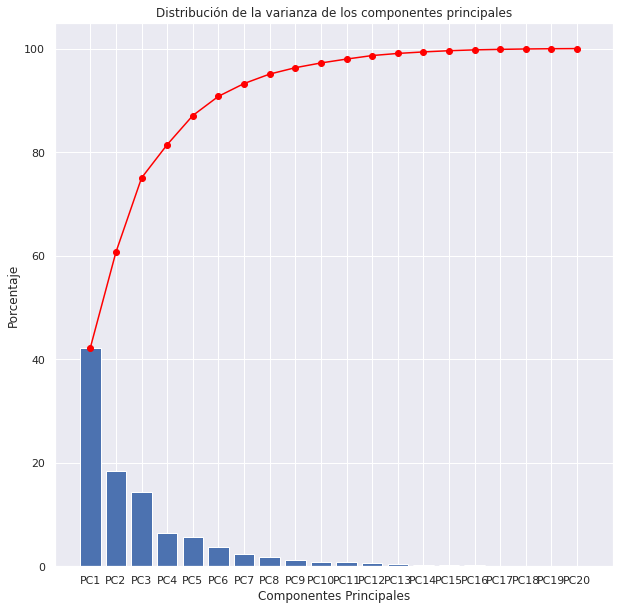

In [279]:
plt.bar(pca_columns,var_explicada)
plt.plot(pca_columns,Acumulated_var, color='red', marker='o')
plt.xlabel("Componentes Principales")
plt.ylabel("Porcentaje")
plt.title("Distribución de la varianza de los componentes principales")
plt.show()

In [280]:
pca_labels = [f'PC{i + 1}' for i in range(len(scaled_ndf_num.columns))]
pcaSummary_ndf.index = pca_labels
pcaSummary_ndf

,% varianza explicada,% varianza acumulada
PC1,42.20,42.203618
PC2,18.48,60.680846
PC3,14.34,75.019458
PC4,6.42,81.442881
PC5,5.62,87.067048
PC6,3.71,90.777317
PC7,2.47,93.245263
PC8,1.83,95.075445
PC9,1.23,96.306818
PC10,0.92,97.222941


Con la gráfica anterior y el listado generado, se observa que el 75.01% de los datos puede ser explicada con los tres primeros componentes principales.

Con estos tres componentes los podemos seleccionar para trabajar con ellos.

In [281]:
pcas = PCA(n_components=3)
X_nueva = pcas.fit_transform(scaled_ndf_num)

Para indicar la importancia de los componentes principales seleccionados se tiene:

PC1= 42.2 %

PC2= 18.48%

PC3= 14.34%

In [282]:
pcas.explained_variance_ratio_

array([0.42203618, 0.18477227, 0.14338613])

In [283]:
np.cov(X_nueva.T)

array([[6.20526799e-02, 1.37124051e-19, 4.83640233e-19],
       [1.37124051e-19, 2.71673737e-02, 5.09212016e-18],
       [4.83640233e-19, 5.09212016e-18, 2.10823000e-02]])

In [284]:
pcas.explained_variance_

array([0.06205268, 0.02716737, 0.0210823 ])

Ahora, para analizar las variables de cada componente, vamos a descomponer los componentes principales con mayor importancia (PC1, PC2, y PC3), tanto numéricamente como gráficamente.

In [285]:
ndf_components = pd.DataFrame(pcas.components_, index = ('PC1','PC2','PC3'), columns = scaled_ndf_num.columns)
ndf_components = ndf_components.abs()
ndf_components

,Credito_Otorgado,Edad,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,PP_Apr,BS_Sep,BS_Aug,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
PC1,0.199013,0.069418,0.326703,0.407655,0.421600,0.416537,0.396385,0.380328,0.074142,0.082434,0.046778,0.076687,0.076699,0.057013,0.002404,0.002311,0.003710,0.004945,0.007482,0.006158
PC2,0.405848,0.809858,0.006905,0.018066,0.022994,0.034831,0.039848,0.045400,0.190353,0.199373,0.112024,0.180637,0.177963,0.131727,0.018879,0.011040,0.019784,0.022935,0.033517,0.030769
PC3,0.530537,0.580381,0.053491,0.039396,0.029443,0.011518,0.011521,0.022502,0.277765,0.291769,0.163910,0.266263,0.263004,0.194779,0.028901,0.016967,0.029841,0.036336,0.052420,0.048985


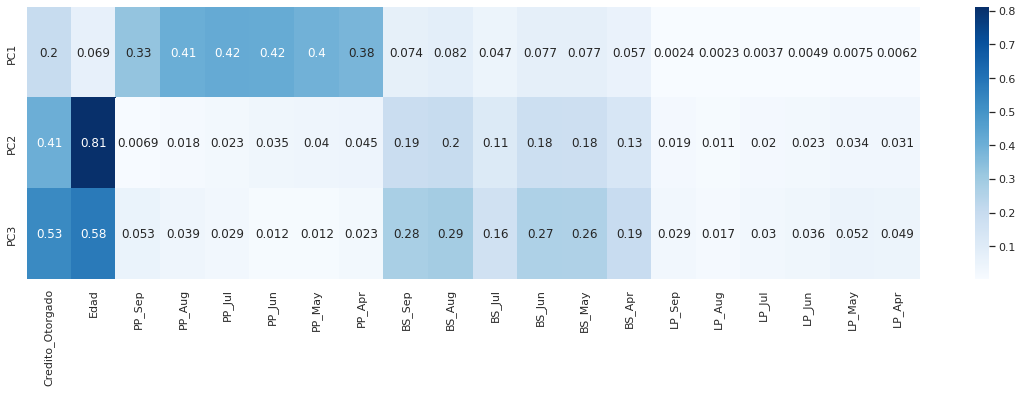

In [286]:
corr = ndf_components
sns.set(rc = {'figure.figsize': (20,5)})
sns.heatmap(corr, annot = True, cmap = "Blues")

Como se puede observar en la descomposición numérica y gráfica, las variables más importantes en ambos componentes principales son Crédito Otorgado, Edad y el Pago de Septiembre, siendo la Edad la variable más importante.

8. Elabora los histogramas de los atributos para visualizar su distribución


In [287]:
X_nueva = pd.DataFrame(X_nueva,columns =('PC1','PC2','PC3') )
X_nueva

,PC1,PC2,PC3
0,-0.020521,-0.273973,-0.043387
1,0.174663,-0.173883,0.015432
2,0.051330,-0.073566,-0.063689
3,0.063270,-0.030352,-0.089166
4,-0.043563,0.227199,-0.308372
...,...,...,...
29953,0.055160,0.138226,0.085819
29954,-0.133537,0.056439,-0.125820
29955,0.353615,-0.050984,-0.169602
29956,0.006342,0.040400,-0.104083


In [288]:
dataframe = ColumnasCat.merge(X_nueva, how='inner', left_index=True, right_index=True)
dataframe.head()

,Genero,Educacion,Estatus_Marital,PC1,PC2,PC3
0,2.0,2.0,1.0,-0.020521,-0.273973,-0.043387
1,2.0,2.0,2.0,0.174663,-0.173883,0.015432
2,2.0,2.0,2.0,0.051330,-0.073566,-0.063689
3,2.0,2.0,1.0,0.063270,-0.030352,-0.089166
4,1.0,2.0,1.0,-0.043563,0.227199,-0.308372


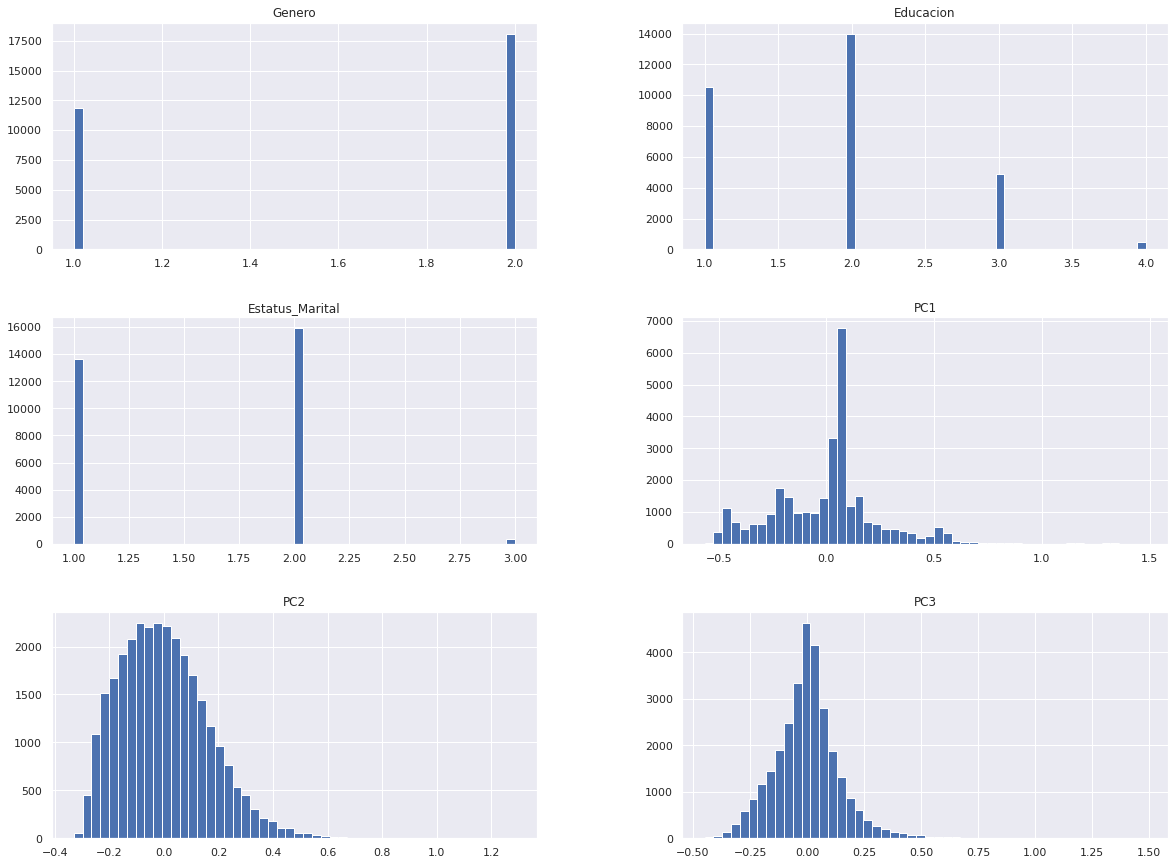

In [289]:
dataframe.hist(bins = 50, figsize = (20,15))
plt.show()

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.


['Genero', 'Educacion', 'Estatus_Marital', 'PC1', 'PC2']
Genero


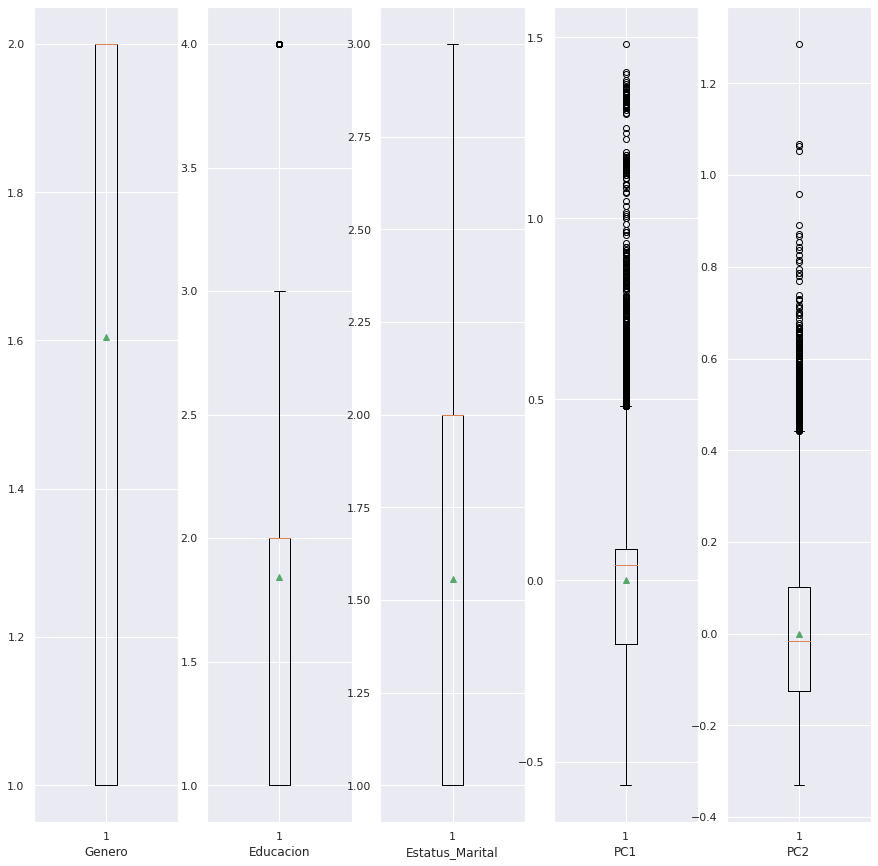

In [290]:
sns.set(rc={'figure.figsize':(15,15)})
nombres = ['Genero','Educacion', 'Estatus_Marital','PC1', 'PC2']
print(nombres)
fig, axes = plt.subplots(2, 4)
k=0
print(nombres[0])
for name in nombres:
  plt.subplot(1,5,k+1) 
  plt.boxplot(dataframe[name], showmeans=True)
  plt.xlabel(name)
  k+=1

plt.show()

Podemos apreciar que hay suficiente varianza tanto en hombres como mujeres. Para la educación se agrupa la mayoría de los datos en universitarios y posgrados. 

PAra el estatus marital, la mayor parte se agrupa en casados.

In [291]:
dataframe.Educacion.value_counts().sort_index(ascending = True)

1.0    10558
2.0    13989
3.0     4902
4.0      467
Name: Educacion, dtype: int64

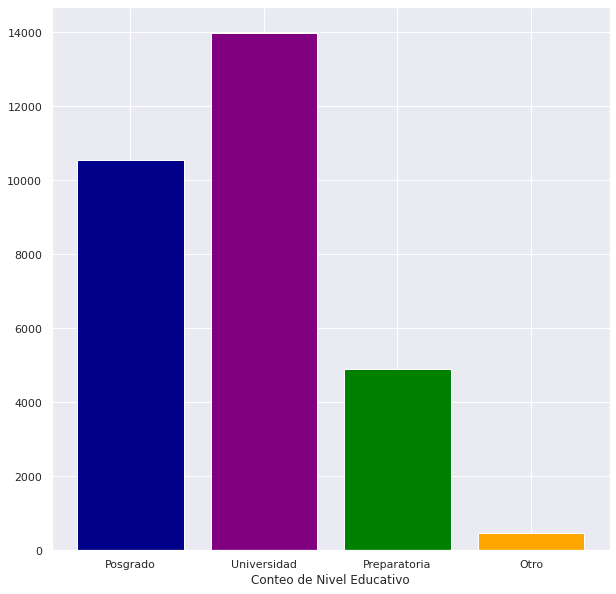

In [292]:
sns.set(rc={'figure.figsize':(10,10)})
Label = ["Posgrado","Universidad", "Preparatoria", "Otro"]
plt.xlabel('Conteo de Nivel Educativo')
plt.bar(Label, dataframe.Educacion.value_counts().sort_index(ascending = True),color = ['darkblue','purple','green', 'orange'])

  
plt.show()

El analizar los niveles de educación de las personas con un título, permite identificar que la mayoría cuentan con estudios universitarios concluidos o de posgrado.

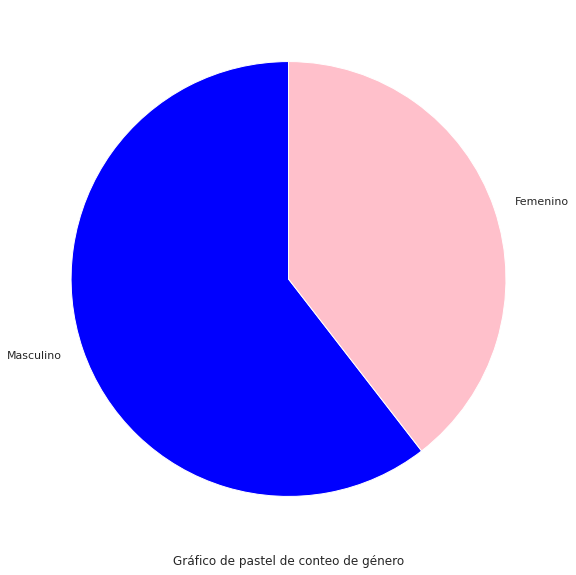

In [293]:
y = np.array(dataframe.Genero.value_counts())
mylabels = ['Masculino', 'Femenino']
mycolors = ['blue','pink']

plt.pie(y, labels = mylabels, startangle = 90,colors = mycolors)
plt.xlabel('Gráfico de pastel de conteo de género')
plt.show()

La mayor parte de los créditos otorgados es a las personas de género masculino. Probablemente debido al sesgo que existe entre oportunidades de acceso a educación y trabajo.

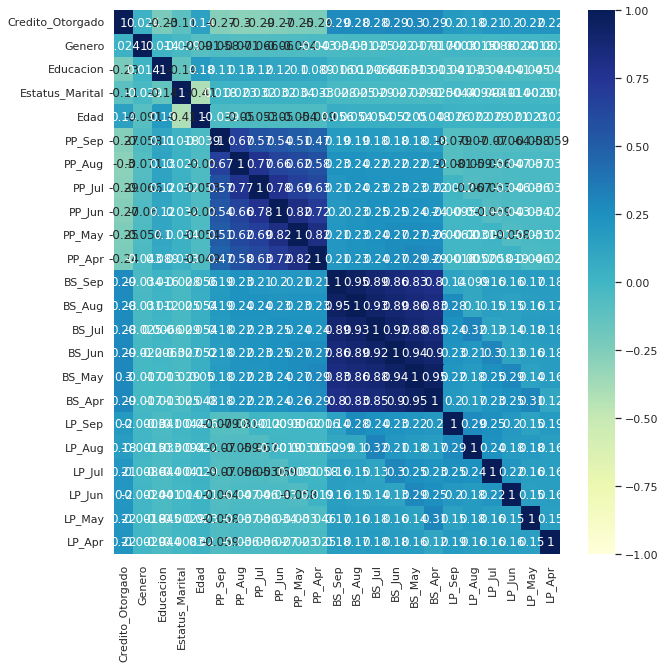

In [294]:
sns.heatmap(ndf.corr(), vmin=-1, vmax=1, annot=True, cmap = "YlGnBu")

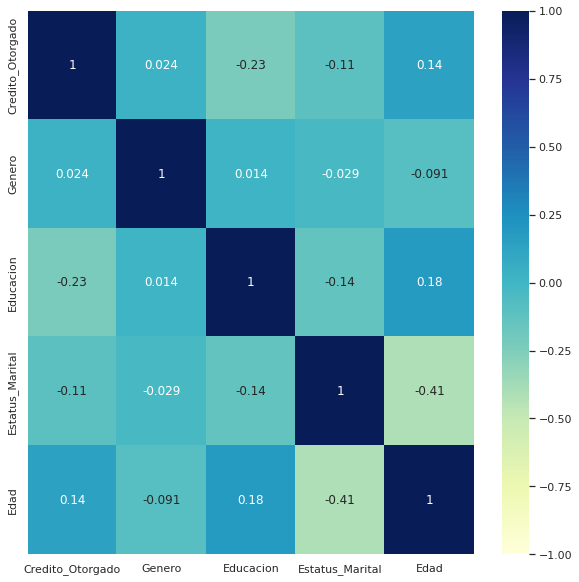

In [295]:
sns.heatmap(ndf[['Credito_Otorgado','Genero','Educacion','Estatus_Marital','Edad']].corr(), vmin=-1, vmax=1, annot=True, cmap = "YlGnBu")

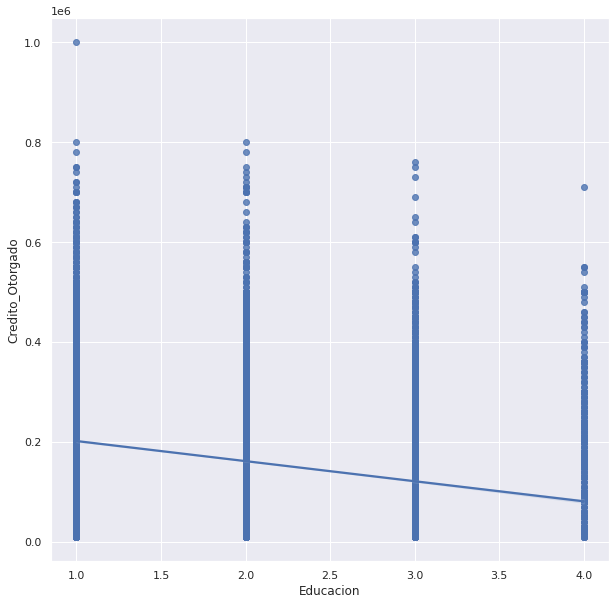

In [250]:
sns.regplot(data = ndf,
            x = ndf.Educacion,
            y = ndf.Credito_Otorgado)

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.